In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


import env
import wrangle
import os

# turn off pink boxes for demo
import warnings
warnings.filterwarnings("ignore")

In [2]:
# acquire the data
df = wrangle.get_zillow_data()

Using cached csv


In [3]:
# check shape of initial dataframe
df.shape

(77580, 69)

In [5]:
# clean df and check in with shape
zillow = wrangle.clean_zillow(df)
zillow.shape

(64838, 31)

In [6]:
# split the data 
train, validate, test = wrangle.split_data(zillow)

# check the size of the splits
train.shape, validate.shape, test.shape

((36309, 31), (15561, 31), (12968, 31))

In [7]:
# run my handle_nulls function on splits, data is now ready for exploration
train, validate, test = wrangle.handle_nulls(train, validate, test)

In [9]:
train.describe()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,finishedsquarefeet12,latitude,longitude,lotsizesquarefeet,regionidcity,regionidcounty,regionidzip,...,taxamount,censustractandblock,logerror,age,sqft_per_bed,sqft_per_bath,total_rooms,bed_bath_rooms_per_sqft_living,taxrate,dollars_per_sqft
count,36309.000000,36309.000000,36309.000000,36309.000000,3.630900e+04,3.630900e+04,3.630900e+04,36309.000000,36309.000000,36309.000000,...,36309.000000,3.630900e+04,36309.000000,36292.000000,36309.000000,36309.000000,36309.000000,36309.000000,36309.000000,36309.000000
mean,2.188163,2.964114,1646.273100,1646.825911,3.400769e+07,-1.181927e+08,2.907079e+04,33318.116032,2492.924729,96611.559365,...,4913.367200,6.051109e+13,0.006026,47.494627,567.913299,777.292013,5.152276,0.003314,0.013153,249.852225
std,0.794288,0.962418,696.358021,695.504066,2.705523e+05,3.660323e+05,1.275548e+05,46439.010715,814.940336,3580.529524,...,3150.326531,2.227418e+12,0.059216,22.637857,179.327222,233.614088,1.551306,0.000766,0.006519,149.292564
min,1.000000,1.000000,152.000000,152.000000,3.334062e+07,-1.194754e+08,4.350000e+02,3491.000000,1286.000000,95982.000000,...,49.180000,6.037101e+13,-0.204762,2.000000,30.400000,76.000000,2.000000,0.000655,0.000094,0.304507
25%,2.000000,2.000000,1156.000000,1158.000000,3.380661e+07,-1.184121e+08,6.000000e+03,12447.000000,1286.000000,96218.000000,...,2636.940000,6.037401e+13,-0.022814,30.000000,441.666667,613.333333,4.000000,0.002779,0.011639,144.545397
50%,2.000000,3.000000,1480.000000,1482.000000,3.401226e+07,-1.181559e+08,7.210000e+03,25218.000000,3101.000000,96414.000000,...,4274.090000,6.037621e+13,0.005383,46.000000,534.500000,746.000000,5.000000,0.003289,0.012281,237.722028
75%,3.000000,4.000000,1968.000000,1967.000000,3.418052e+07,-1.179110e+08,1.026600e+04,45398.000000,3101.000000,96993.000000,...,6415.340000,6.059052e+13,0.033109,63.000000,654.750000,903.000000,6.000000,0.003802,0.013469,330.603458
max,5.500000,8.000000,4610.000000,4610.000000,3.481877e+07,-1.175593e+08,6.971010e+06,396556.000000,3101.000000,399675.000000,...,17853.690000,4.830301e+14,0.218255,132.000000,3054.000000,3438.000000,13.000000,0.046053,0.816490,3872.229167


In [41]:
train.dtypes

bathroomcnt                       float64
bedroomcnt                        float64
calculatedfinishedsquarefeet      float64
finishedsquarefeet12              float64
latitude                          float64
longitude                         float64
lotsizesquarefeet                 float64
propertycountylandusecode          object
regionidcity                      float64
regionidcounty                    float64
regionidzip                       float64
roomcnt                           float64
unitcnt                           float64
structuretaxvaluedollarcnt        float64
taxvaluedollarcnt                 float64
assessmentyear                    float64
landtaxvaluedollarcnt             float64
taxamount                         float64
censustractandblock               float64
logerror                          float64
transactiondate                    object
heatingorsystemdesc                object
propertylandusedesc                object
county                            

In [ ]:
scaler = MinMaxScaler()
cols = train.drop(columns = ['propertycountylandusecode', 'transactiondate', 'heatingorsystemdesc', 'county']).columns.tolist()

# data needs to be split.
# .copy function makes a proper copy

train_scaled = train.copy()
validate_scaled = validate.copy()
test_scaled = test.copy()

train_scaled[cols] = scaler.fit_transform(train[cols])
validate_scaled[cols] = scaler.fit_transform(validate[cols])
test_scaled[cols] = scaler.fit_transform(test[cols])

In [16]:
train.columns.tolist()

['bathroomcnt',
 'bedroomcnt',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'propertycountylandusecode',
 'regionidcity',
 'regionidcounty',
 'regionidzip',
 'roomcnt',
 'unitcnt',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'assessmentyear',
 'landtaxvaluedollarcnt',
 'taxamount',
 'censustractandblock',
 'logerror',
 'transactiondate',
 'heatingorsystemdesc',
 'propertylandusedesc',
 'county',
 'age',
 'sqft_per_bed',
 'sqft_per_bath',
 'total_rooms',
 'bed_bath_rooms_per_sqft_living',
 'taxrate',
 'dollars_per_sqft']

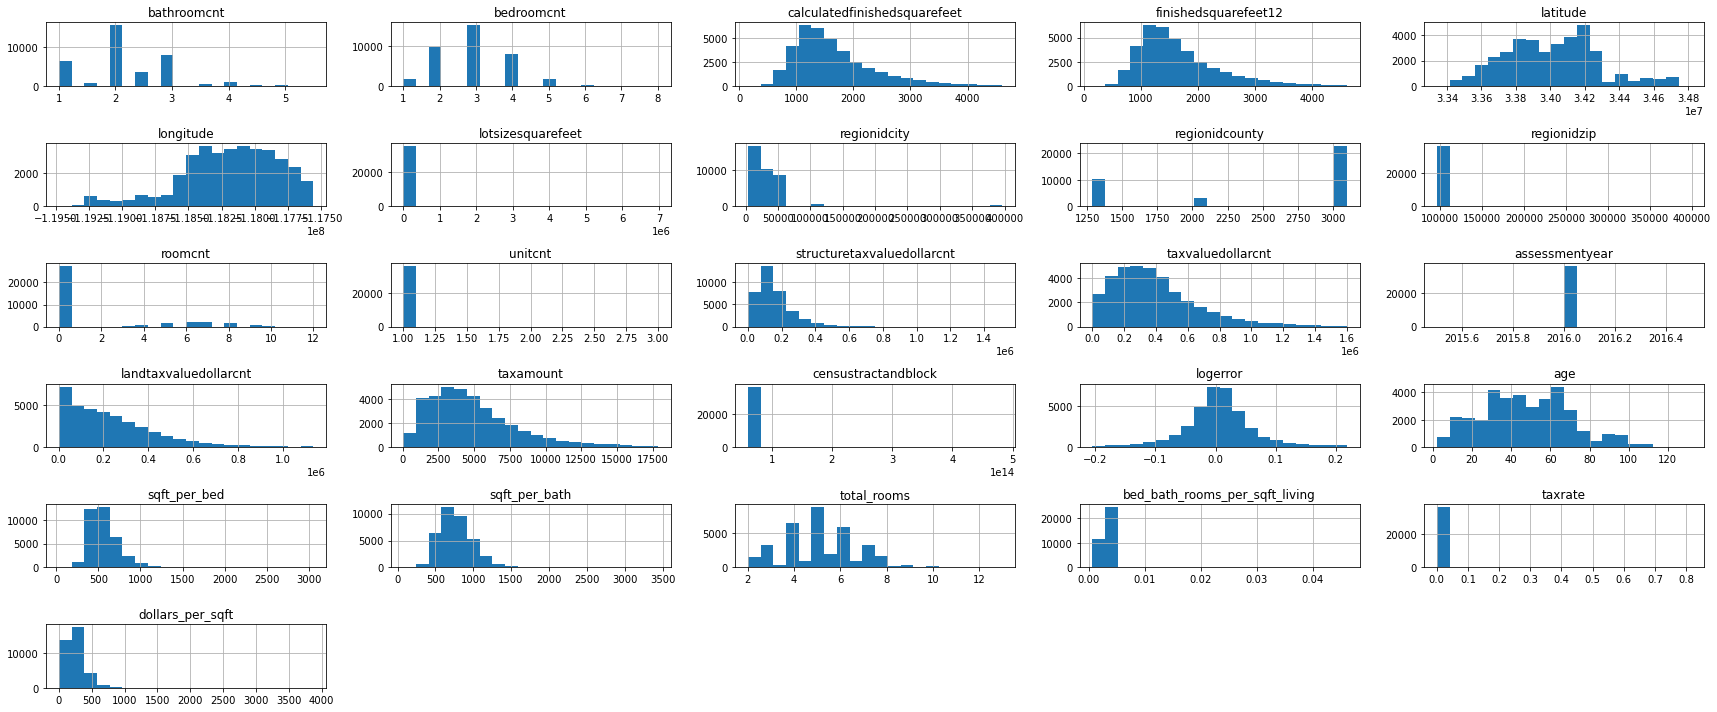

In [15]:
train.hist(figsize = (24,10), bins = 20)
plt.tight_layout()

# Does logerror change based on county?

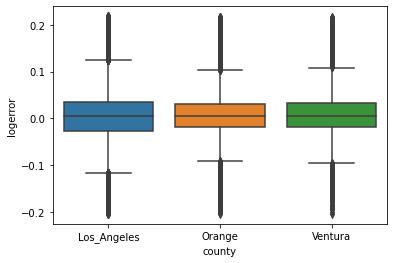

In [32]:
sns.boxplot(train.county, train.logerror,)
plt.show()

In [19]:
train.groupby('county').logerror.mean()

county
Los_Angeles    0.004948
Orange         0.007553
Ventura        0.008815
Name: logerror, dtype: float64

In [22]:
train.logerror.mean()

0.006026351023219386

<AxesSubplot:>

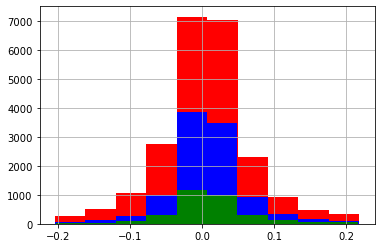

In [33]:
ax = train[train.county == 'Los_Angeles'].logerror.hist(color = 'red')
train[train.county == 'Orange'].logerror.hist(ax = ax, color = 'blue')
train[train.county == 'Ventura'].logerror.hist(ax = ax, color = 'green')

In [34]:
train.groupby('county').logerror.describe()

,count,mean,std,min,25%,50%,75%,max
county,,,,,,,,
Los_Angeles,22802.0,0.004948,0.062256,-0.204664,-0.026066,0.005349,0.034278,0.218255
Orange,10363.0,0.007553,0.052725,-0.204762,-0.018292,0.005361,0.030564,0.217817
Ventura,3144.0,0.008815,0.056588,-0.203798,-0.018877,0.005491,0.031985,0.217128


#### Takeaways
- Most houses in order by county are LA, Orange, Ventura
- 50% values are very similar, lower 25%/upper 75% is where LA stands apart

# How does age affect logerror?

In [39]:
# fit with KMeans

X = train[['age', 'county']]
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)

# using .labels_ function works for fitting the train data, kmeans.predict(X) will be needed for unseen data (validate/test)
train['cluster'] = kmeans.predict(X)

train_scaled
train_scaled.head()

AttributeError: 'DataFrame' object has no attribute 'logerrer'